# Support Vector Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### SVM is a **binary classification** algorithm find the **"widest possible street"** between classes.

#### It draws the best-fit line (called a hyperplan) and takes the maximum margin (this lead to the better generalization).

#### Support Vector --> Support Vectors are the data points that lie closest to the decision boundary (hyperplane) and “support” the margin.




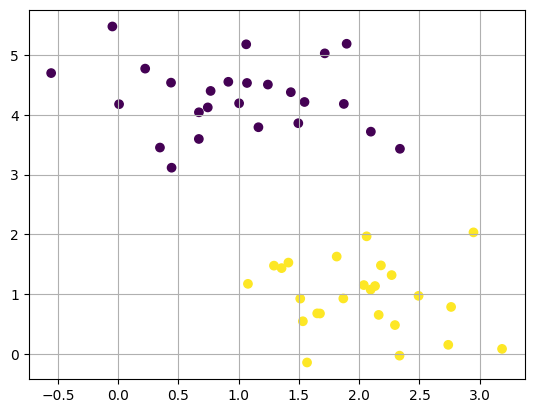

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

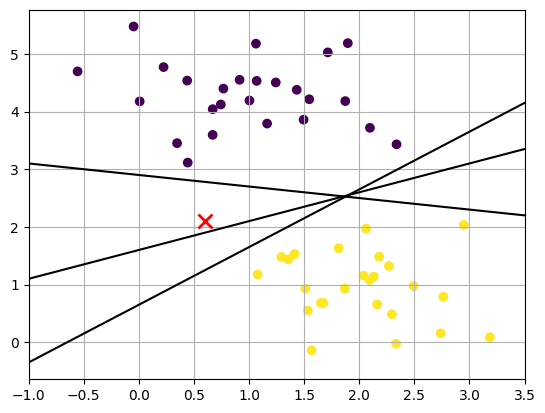

In [3]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#where should this value be classified as?
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

(-1.0, 3.5)

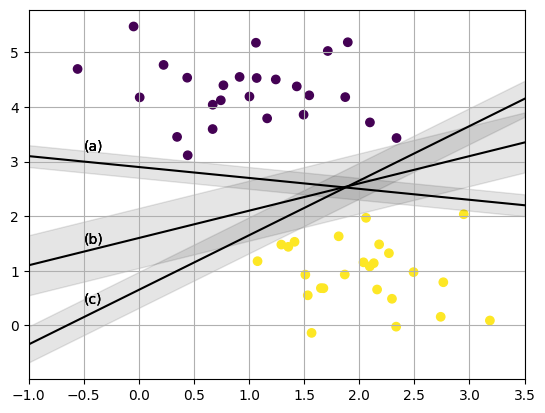

In [4]:
xfit = np.linspace(-1, 3.5)
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.annotate(text = '(a)', xy = (3, 5), xytext = (-0.5, 3.2))
    plt.annotate(text = '(b)', xy = (3, 5), xytext = (-0.5, 1.5))
    plt.annotate(text = '(c)', xy = (3, 5), xytext = (-0.5, 0.4))
    plt.fill_between(xfit, yfit - d, yfit + d,
                     color='black', alpha=0.1)

plt.xlim(-1, 3.5)

### Step 1: Define the problem variables
We have a dataset of points $(x^{(i)}, y^{(i)})$, where:

$x^{(i)}$ is the input feature vector for the $i^{th}$ example.

$y^{(i)} \in {-1, 1}$ is the class label (binary classification).

We want to learn parameters $\mathbf{w}$ (weight vector) and $b$ (bias) that define a decision boundary.


### Step 2: Understand the decision boundary (hyperplane)
The decision boundary is defined by the equation:

$𝑤^⊤𝑥+ 𝑏 = 0 $

This separates the space into two halves:

1. One where $\mathbf{w}^\top \mathbf{x} + b > 0$ predicts class $+1$

2. The other where $\mathbf{w}^\top \mathbf{x} + b < 0$ predicts class $-1$


### Step 3: Define margin boundaries (support hyperplanes)
We define two parallel boundaries (margins):

$𝑤^⊤ 𝑥 + 𝑏 = 1$ and

$ 𝑤^⊤ 𝑥 + 𝑏 = − 1$

These boundaries are placed so that no data points lie between them.

The region between these two lines is called the margin.


### Step 4: The margin width formula
The distance between these two margin boundaries (the margin width) is:

$margin = \frac{2} {∥ 𝑤 ∥} $

Intuition: smaller $|\mathbf{w}|$ means wider margin.


### Step 5: Classification constraints
All training points must be correctly classified and lie outside or on the margin boundaries:

$𝑦^{(𝑖)}(𝑤^⊤𝑥^{(𝑖)}+𝑏)≥1 , for all 𝑖=1,…,𝑚 $

This means:

If $y^{(i)} = 1$, then $\mathbf{w}^\top x^{(i)} + b \geq 1$

If $y^{(i)} = -1$, then $\mathbf{w}^\top x^{(i)} + b \leq -1$


Thus the optimization problem can be summarized as:

$$
\begin{aligned}
	\min_{w, b} f(\mathbf{w},b) &= \min_{\mathbf{w}, b}  \  \frac{1}{2} ||\mathbf{w}||^2
	\\
	s.t. \ \  g_i(\mathbf{w},b) &= - (y^{(i)} (\mathbf{w}^{\top} x^{(i)} + b) - 1) \leq 0
\end{aligned}
$$

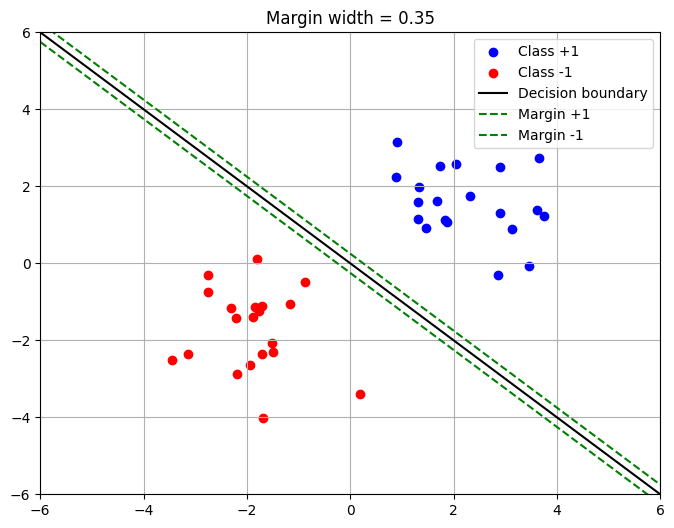

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Generate linearly separable data points
np.random.seed(1)
num_points = 20
X_pos = np.random.randn(num_points, 2) + [2, 2]
X_neg = np.random.randn(num_points, 2) + [-2, -2]
X = np.vstack((X_pos, X_neg))
y = np.array([1]*num_points + [-1]*num_points)

fig, ax = plt.subplots(figsize=(8, 6))

def plot_svm(w, b):
    ax.clear()
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class +1')
    ax.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')

    x_vals = np.linspace(-6, 6, 300)
    y_vals = -(w[0]*x_vals + b) / w[1]
    ax.plot(x_vals, y_vals, 'k-', label='Decision boundary')

    y_margin_pos = -(w[0]*x_vals + b - 1) / w[1]
    y_margin_neg = -(w[0]*x_vals + b + 1) / w[1]
    ax.plot(x_vals, y_margin_pos, 'g--', label='Margin +1')
    ax.plot(x_vals, y_margin_neg, 'g--', label='Margin -1')

    margin_width = 2 / np.linalg.norm(w)
    ax.set_title(f"Margin width = {margin_width:.2f}")
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.legend()
    ax.grid(True)

def animate(frame):
    scale = 4 - frame*0.1
    w = np.array([1, 1]) * scale
    b = 0
    plot_svm(w, b)

# ani = FuncAnimation(fig, animate, frames=30, interval=200, repeat=True)

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

ani = FuncAnimation(fig, animate, frames=30, interval=200, repeat=True)

HTML(ani.to_jshtml())


## Hard Margin Vs Soft Margin

### SVM from scratch: Hard Margin

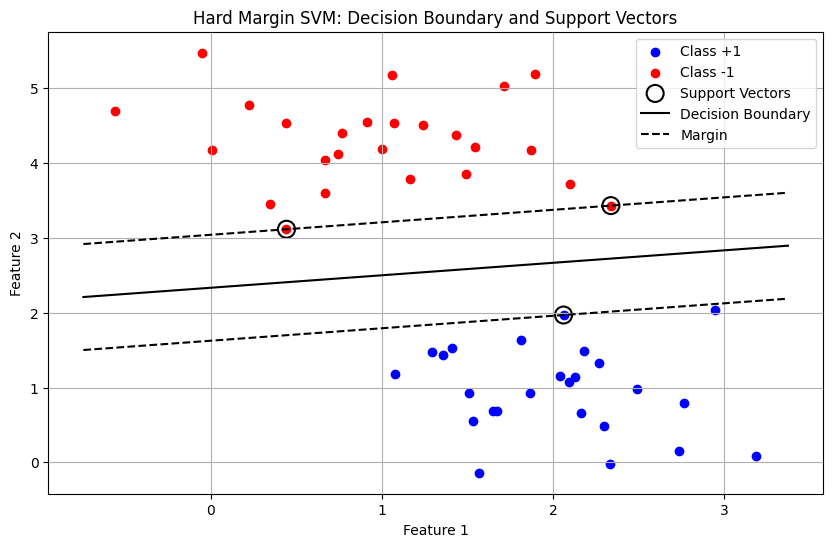

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
y = 2*y - 1  # Convert labels from {0,1} to {-1,1}

m, n = X.shape
y = y.reshape(-1, 1) * 1.

# Compute H matrix for QP
X_dash = y * X
H = np.dot(X_dash, X_dash.T) * 1.

# Convert to cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

# Solver params
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Solve QP problem
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

# Compute weight vector w
w = ((y * alphas).T @ X).reshape(-1, 1)

# Support vectors have alpha > 1e-4
S = (alphas > 1e-4).flatten()

# Compute bias b (take mean for numerical stability)
b = y[S] - np.dot(X[S], w)
b = np.mean(b)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], color='blue', label='Class +1')
plt.scatter(X[y.flatten() == -1, 0], X[y.flatten() == -1, 1], color='red', label='Class -1')
plt.scatter(X[S, 0], X[S, 1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

# Decision boundary
x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, 200)
w = w.flatten()
yy = (-w[0] * xx - b) / w[1]

# Margins
margin = 1 / np.linalg.norm(w)
yy_down = yy - margin * np.sqrt(1 + (w[0]/w[1])**2)
yy_up = yy + margin * np.sqrt(1 + (w[0]/w[1])**2)

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margin')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM: Decision Boundary and Support Vectors')
plt.legend()
plt.grid(True)
plt.show()


### SVM from Scratch: Soft Margin

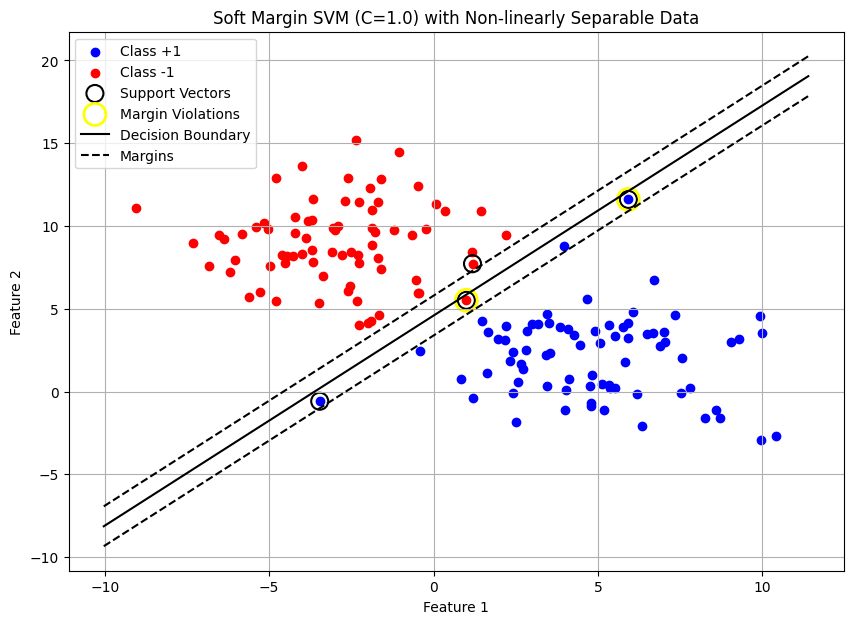

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.datasets import make_blobs

# Generate non-linearly separable data by overlapping blobs with higher std deviation
X, y = make_blobs(n_samples=150, centers=2, cluster_std=2.5, random_state=42)
y = 2*y - 1  # Convert labels from {0,1} to {-1,1}

m, n = X.shape
y = y.reshape(-1, 1) * 1.

# Compute H matrix
X_dash = y * X
H = np.dot(X_dash, X_dash.T)

# Soft margin parameter
C = 1.0

# cvxopt matrices
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))

G_std = -np.eye(m)
h_std = np.zeros(m)

G_slack = np.eye(m)
h_slack = C * np.ones(m)

G = cvxopt_matrix(np.vstack((G_std, G_slack)))
h = cvxopt_matrix(np.hstack((h_std, h_slack)))

A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

# Solver options
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Solve QP
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x']).flatten()

# Compute w and b
w = ((y.flatten() * alphas) @ X).reshape(-1, 1)
S = alphas > 1e-4
violations = alphas >= (C - 1e-5)
b_val = np.mean(y[S] - X[S] @ w)

# Plotting
plt.figure(figsize=(10,7))
plt.scatter(X[y.flatten()==1,0], X[y.flatten()==1,1], color='blue', label='Class +1')
plt.scatter(X[y.flatten()==-1,0], X[y.flatten()==-1,1], color='red', label='Class -1')
plt.scatter(X[S,0], X[S,1], s=150, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
plt.scatter(X[violations,0], X[violations,1], s=250, facecolors='none', edgecolors='yellow', linewidths=2, label='Margin Violations')

x_min, x_max = plt.xlim()
xx = np.linspace(x_min, x_max, 300)

w_flat = w.flatten()
yy = (-w_flat[0] * xx - b_val) / w_flat[1]

margin = 1 / np.linalg.norm(w_flat)
yy_down = yy - margin * np.sqrt(1 + (w_flat[0]/w_flat[1])**2)
yy_up = yy + margin * np.sqrt(1 + (w_flat[0]/w_flat[1])**2)

plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.plot(xx, yy_down, 'k--', label='Margins')
plt.plot(xx, yy_up, 'k--')

plt.title(f'Soft Margin SVM (C={C}) with Non-linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()



#### SVM using kernel

Accuracy: 1.0


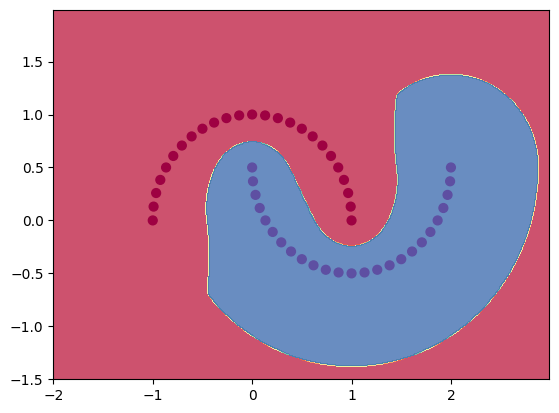

In [25]:
import cvxopt
from sklearn import datasets

#here I use z instead of xprime since I don't know how to write prime in code....
def linear(x, z):
    return np.dot(x, z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p

def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel=gaussian, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.y = y
        self.X = X
        m, n = X.shape

        # Calculate Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def predict(self, X):  #<----this is X_test
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv

if __name__ == "__main__":
    X, y = datasets.make_moons(50)

    #transform our y to be -1 and 1 to meet svm purpose
    y[y==0] = -1

    svm = SVM(kernel=gaussian)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    plot_contour(X, y, svm)

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")